In [17]:
import pandas as pd
import numpy as np
df=pd.read_csv('../data/clickbait_data.csv')
df

,headline,clickbait
0,Should I Get Bings,1
1,Which TV Female Friend Group Do You Belong In,1
2,"The New ""Star Wars: The Force Awakens"" Trailer...",1
3,"This Vine Of New York On ""Celebrity Big Brothe...",1
4,A Couple Did A Stunning Photo Shoot With Their...,1
...,...,...
31995,"To Make Female Hearts Flutter in Iraq, Throw a...",0
31996,"British Liberal Democrat Patsy Calton, 56, die...",0
31997,Drone smartphone app to help heart attack vict...,0
31998,"Netanyahu Urges Pope Benedict, in Israel, to D...",0


In [18]:
df['headline']=df['headline'].apply(lambda x: x.lower())
df

,headline,clickbait
0,should i get bings,1
1,which tv female friend group do you belong in,1
2,"the new ""star wars: the force awakens"" trailer...",1
3,"this vine of new york on ""celebrity big brothe...",1
4,a couple did a stunning photo shoot with their...,1
...,...,...
31995,"to make female hearts flutter in iraq, throw a...",0
31996,"british liberal democrat patsy calton, 56, die...",0
31997,drone smartphone app to help heart attack vict...,0
31998,"netanyahu urges pope benedict, in israel, to d...",0


In [19]:
import re
def clean_text_round1(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    #text = re.sub('\w*\d\w*', ' ', text)
    text = re.sub('\n', ' ', text)
    text = re.sub('  ', ' ', text)
    text = re.sub(r'^https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
    text = re.sub(r'\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*', '', text)
    text = re.sub('\[.*?\]', ' ', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('“','',text)
    text = re.sub('”','',text)
    text = re.sub('’','',text)
    text = re.sub('–','',text)
    text = re.sub('‘','',text)
    
    return text

In [20]:
#function to find if string contains a question and if so, update new feature with a 1 for yes or 0 for no
question_words = ['who','what','where','why','when','whose','whom','would','will','how','which','should','could']

def contains_question(headline):
    if "?" in headline or headline.startswith(('who','what','where','why','when','whose','whom','would','will','how','which','should','could','did','do')):
        return 1
    else: 
        return 0

df['question']=df['headline'].apply(contains_question)
df

,headline,clickbait,question
0,should i get bings,1,1
1,which tv female friend group do you belong in,1,1
2,"the new ""star wars: the force awakens"" trailer...",1,0
3,"this vine of new york on ""celebrity big brothe...",1,0
4,a couple did a stunning photo shoot with their...,1,0
...,...,...,...
31995,"to make female hearts flutter in iraq, throw a...",0,0
31996,"british liberal democrat patsy calton, 56, die...",0,0
31997,drone smartphone app to help heart attack vict...,0,0
31998,"netanyahu urges pope benedict, in israel, to d...",0,0


In [21]:
df['question'].value_counts()

0    29242
1     2758
Name: question, dtype: int64

In [24]:
#create function to find if headline contains '!' and create new feature with 1 for yes and 0 for no
def contains_exclamation(headline):
    if "!" in headline: 
        return 1
    else: 
        return 0
df['exclamation']=df['headline'].apply(contains_exclamation)

In [25]:
df.exclamation.value_counts()

0    31962
1       38
Name: exclamation, dtype: int64

In [31]:
#clean headlines to remove puncuation and links
#create feature to count words of each (before removing stop words and numbers)
#create feature to count if headline starts with a digit or not
import string

feature_engineering_clean = lambda x: clean_text_round1(x)
df.headline = pd.DataFrame(df.headline.apply(feature_engineering_clean))


#create function to find if headline starts with a digit and create new feature with 1 for yes and 0 for no
def starts_with_num(headline):
    if headline.startswith(('1','2','3','4','5','6','7','8','9')): 
        return 1
    else: 
        return 0

df['starts_with_num']=df['headline'].apply(starts_with_num)
df

,headline,clickbait,question,exclamation,starts_with_num
0,should i get bings,1,1,0,0
1,which tv female friend group do you belong in,1,1,0,0
2,the new star wars the force awakens trailer is...,1,0,0,0
3,this vine of new york on celebrity big brother...,1,0,0,0
4,a couple did a stunning photo shoot with their...,1,0,0,0
...,...,...,...,...,...
31995,to make female hearts flutter in iraq throw a ...,0,0,0,0
31996,british liberal democrat patsy calton 56 dies ...,0,0,0,0
31997,drone smartphone app to help heart attack vict...,0,0,0,0
31998,netanyahu urges pope benedict in israel to den...,0,0,0,0


In [33]:
#create feature that counts words in each headline
df['headline_words'] = df['headline'].apply(lambda x: len(x.split()))

In [34]:
df = df[df['headline_words'] != 0]
df

,headline,clickbait,question,exclamation,starts_with_num,headline_words
0,should i get bings,1,1,0,0,4
1,which tv female friend group do you belong in,1,1,0,0,9
2,the new star wars the force awakens trailer is...,1,0,0,0,14
3,this vine of new york on celebrity big brother...,1,0,0,0,12
4,a couple did a stunning photo shoot with their...,1,0,0,0,18
...,...,...,...,...,...,...
31995,to make female hearts flutter in iraq throw a ...,0,0,0,0,10
31996,british liberal democrat patsy calton 56 dies ...,0,0,0,0,9
31997,drone smartphone app to help heart attack vict...,0,0,0,0,12
31998,netanyahu urges pope benedict in israel to den...,0,0,0,0,9


In [35]:
df.to_csv('with_engineeredfeat_data.csv')

In [39]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.stem import PorterStemmer

def tokenize(text):
    text = [word_tokenize(x) for x in text]
    return text

df.headline = tokenize(df.headline)

stopwords_list = stopwords.words('english')
df.headline = df['headline'].apply(lambda x: [item for item in x if item not in stopwords_list])

In [42]:
df_cb=df[df['clickbait']==1]
df_noncb=df[df['clickbait']==0]

In [43]:
#creating a list of unique words for each class
cb_list=list(df_cb['headline'])

total_vocab_cb = set()
for word in cb_list:
    total_vocab_cb.update(word)
len(total_vocab_cb)

12322

In [44]:
noncb_list=list(df_noncb['headline'])

total_vocab_noncb = set()
for word in noncb_list:
    total_vocab_noncb.update(word)
len(total_vocab_noncb)

17925

In [45]:
flat_cb = [item for sublist in cb_list for item in sublist]
flat_noncb = [item for sublist in noncb_list for item in sublist]
cb_freq = FreqDist(flat_cb)
noncb_freq = FreqDist(flat_noncb)

In [46]:
#top 20 clickbait words 
cb_freq.most_common(20)

[('things', 997),
 ('people', 914),
 ('know', 803),
 ('make', 760),
 ('17', 671),
 ('21', 643),
 ('based', 607),
 ('actually', 596),
 ('19', 578),
 ('times', 508),
 ('2015', 499),
 ('like', 490),
 ('best', 470),
 ('new', 442),
 ('heres', 423),
 ('need', 403),
 ('life', 387),
 ('23', 368),
 ('18', 352),
 ('15', 350)]

In [47]:
noncb_freq.most_common(20)

[('us', 1145),
 ('new', 803),
 ('dead', 350),
 ('dies', 347),
 ('killed', 347),
 ('president', 297),
 ('uk', 292),
 ('kills', 277),
 ('wins', 271),
 ('australian', 270),
 ('first', 269),
 ('says', 269),
 ('two', 250),
 ('obama', 249),
 ('police', 241),
 ('court', 229),
 ('china', 227),
 ('world', 226),
 ('iraq', 225),
 ('british', 223)]

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style

In [49]:
cb_bar_counts = [x[1] for x in cb_freq.most_common(20)]
cb_bar_words = [x[0] for x in cb_freq.most_common(20)]

noncb_bar_counts = [x[1] for x in noncb_freq.most_common(20)]
noncb_bar_words = [x[0] for x in noncb_freq.most_common(20)]

plt.style.use('seaborn-talk')

C:\Users\abhin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


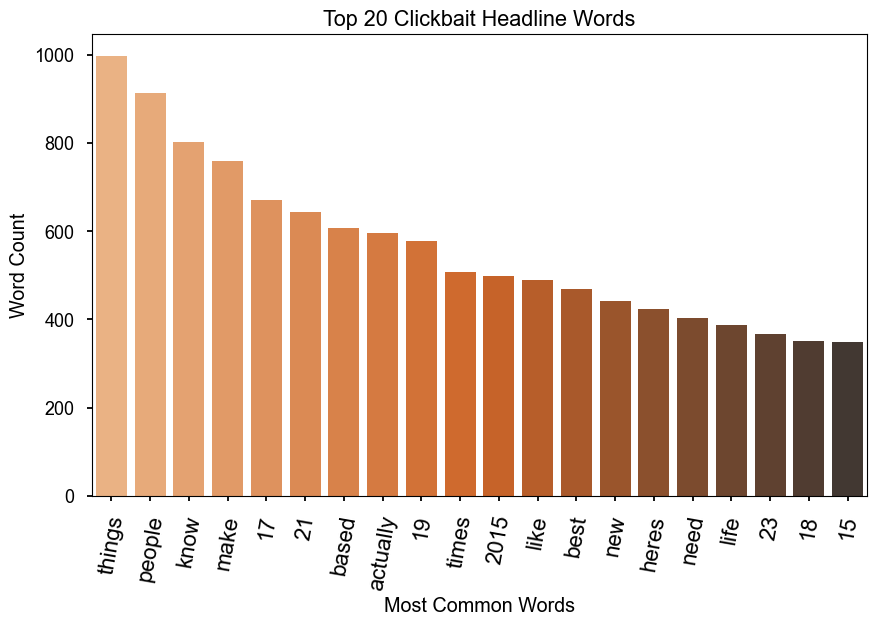

In [50]:
word_freq_figure1 = plt.figure(figsize=(10,6))
sns.barplot(cb_bar_words, cb_bar_counts,palette='Oranges_d')
plt.xticks(fontsize=16)
plt.xticks(rotation=80)
plt.title('Top 20 Clickbait Headline Words')
plt.xlabel('Most Common Words')
plt.ylabel('Word Count')
sns.set_style('white')
plt.show()

C:\Users\abhin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


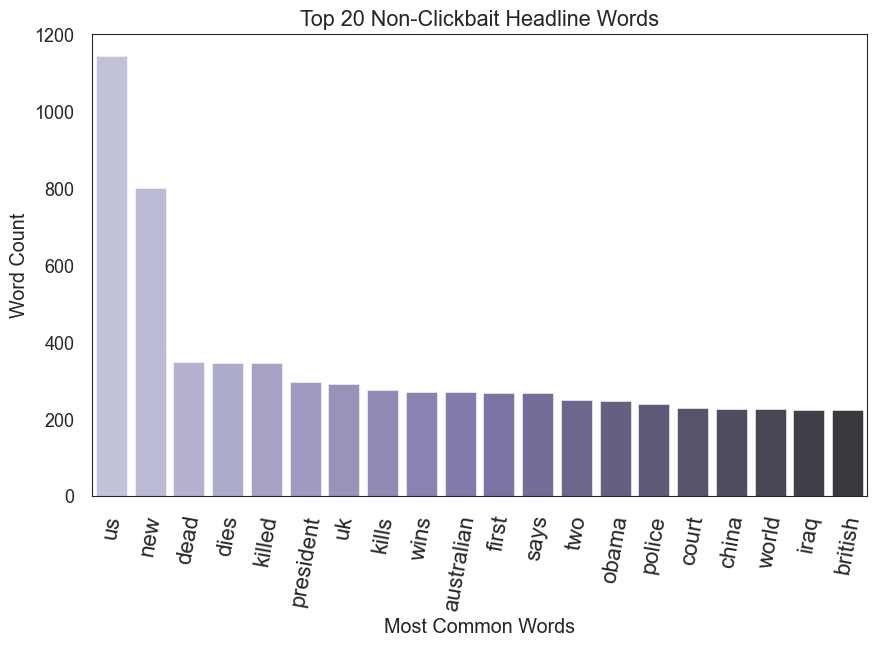

In [51]:
#bar plot for top 15 most common non-clickbait words
word_freq_figure1 = plt.figure(figsize=(10,6))
sns.barplot(noncb_bar_words, noncb_bar_counts,palette='Purples_d')
plt.xticks(fontsize=16)
plt.xticks(rotation=80)
plt.title('Top 20 Non-Clickbait Headline Words')
plt.xlabel('Most Common Words')
plt.ylabel('Word Count')
sns.set_style()
plt.show()

In [54]:
from wordcloud import WordCloud
clickbait_dictionary = dict(zip(cb_bar_words, cb_bar_counts))
nonclickbait_dictionary = dict(zip(noncb_bar_words, noncb_bar_counts))

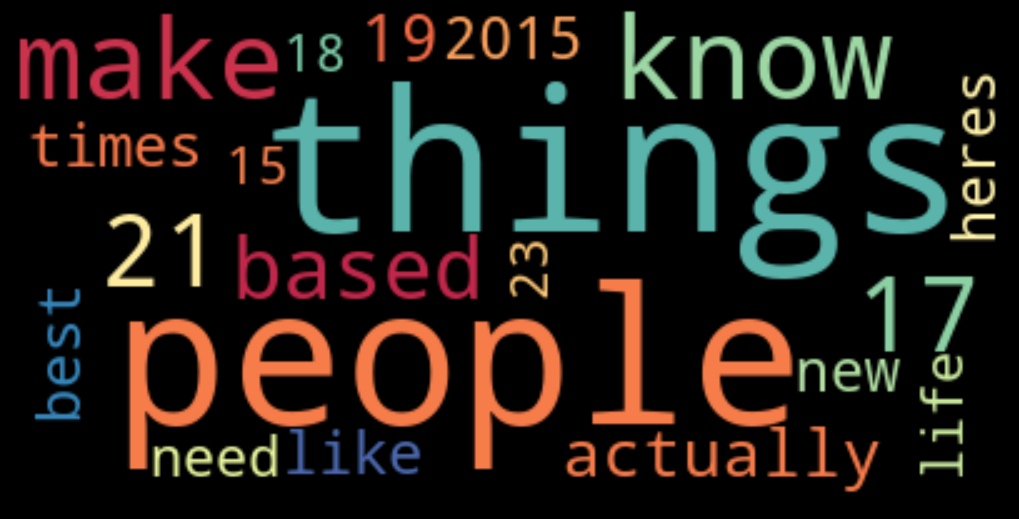

In [55]:
# Create the clickbait word cloud:
wordcloud = WordCloud(colormap='Spectral').generate_from_frequencies(clickbait_dictionary)
plt.figure(figsize=(10,10), facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()

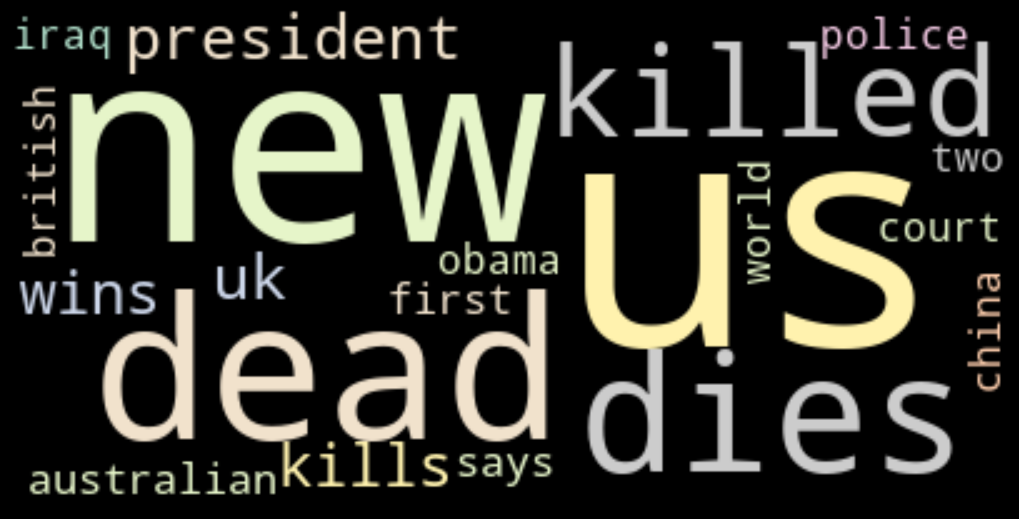

In [56]:
# Create the non-clickbait word cloud:
wordcloud = WordCloud(colormap='Pastel2').generate_from_frequencies(nonclickbait_dictionary)
plt.figure(figsize=(10,10), facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()

C:\Users\abhin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


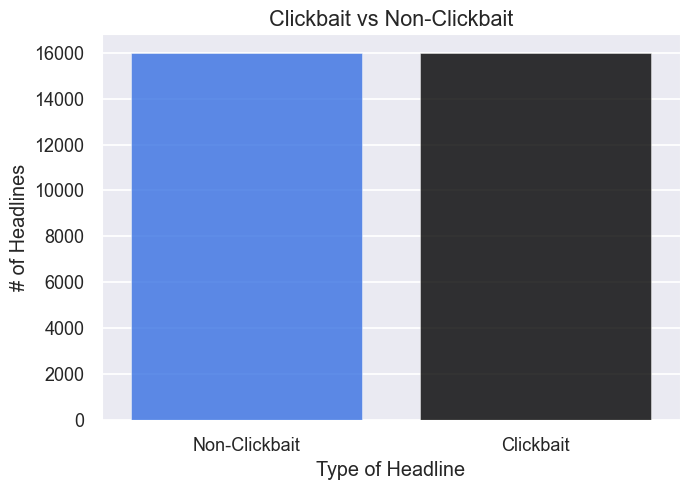

In [58]:
sns.set_style('darkgrid')
plt.figure(figsize=(7,5))
fig1=sns.countplot(df['clickbait'], alpha =.80, palette= ['#1a66ff','black'])
plt.title('Clickbait vs Non-Clickbait')
plt.ylabel('# of Headlines')
plt.xlabel('Type of Headline')
fig1.set(xticklabels=['Non-Clickbait','Clickbait'])
plt.tight_layout()
plt.show()

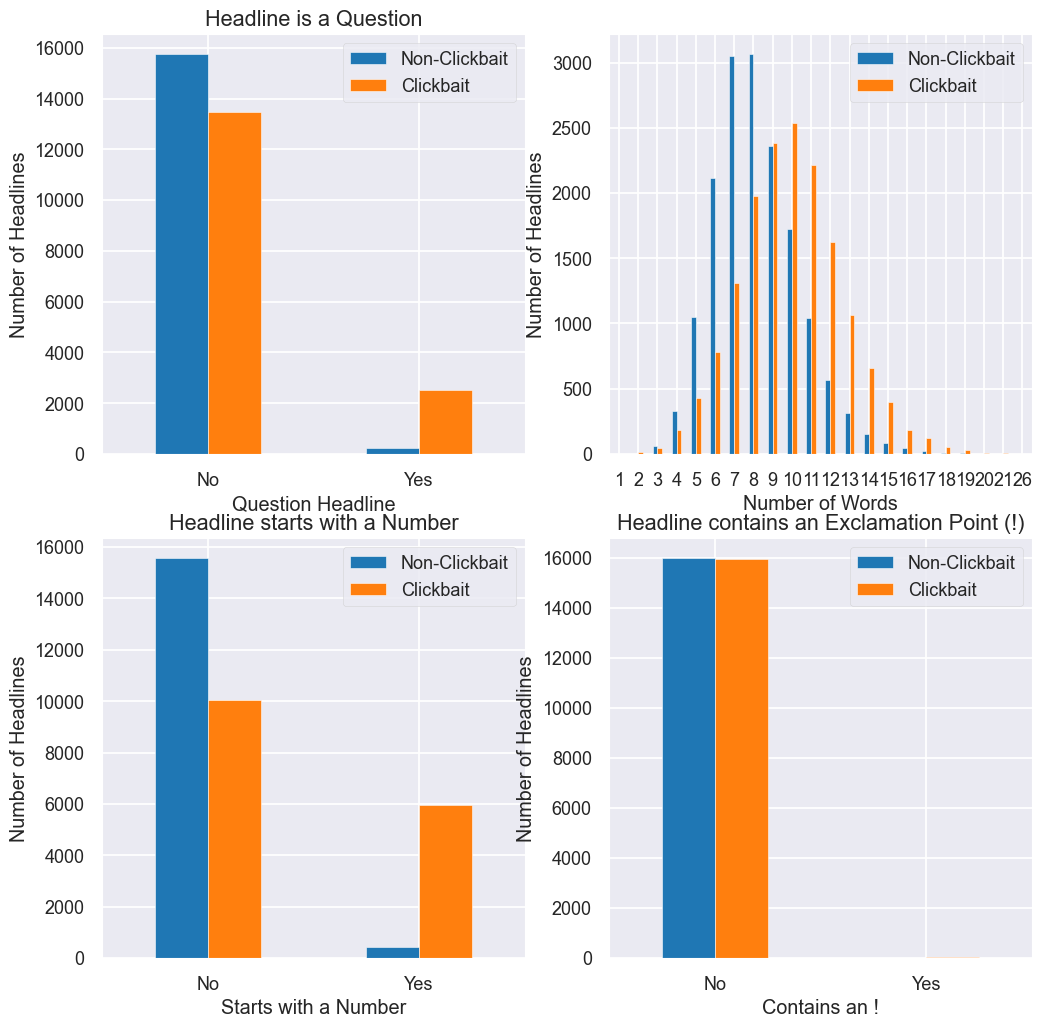

In [64]:
#plotting engineered features to compare by class 
import matplotlib.pyplot as plt
sns.set_style('darkgrid')

figure, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,12))

plot = df.groupby('question')['clickbait'].value_counts().unstack().plot.bar(ax=axes[0,0], rot=0)
plot.set_xlabel('Question Headline')
plot.set_ylabel('Number of Headlines')
plot.legend(title=None,labels=['Non-Clickbait','Clickbait'])
plot.set(xticklabels=['No','Yes'])
plot.set_title('Headline is a Question')

plot = df.groupby('headline_words')['clickbait'].value_counts().unstack().plot.bar(ax=axes[0,1], rot=0)
plot.set_xlabel('Number of Words')
plot.set_ylabel('Number of Headlines')
plot.legend(title=None,labels=['Non-Clickbait','Clickbait'])


plot = df.groupby('starts_with_num')['clickbait'].value_counts().unstack().plot.bar(ax=axes[1,0], rot=0)
plot.set_xlabel('Starts with a Number')
plot.set_ylabel('Number of Headlines')
plot.legend(title=None,labels=['Non-Clickbait','Clickbait'])
plot.set(xticklabels=['No','Yes'])
plot.set_title('Headline starts with a Number')

plot = df.groupby('exclamation')['clickbait'].value_counts().unstack().plot.bar(ax=axes[1,1], rot=0)
plot.set_xlabel('Contains an !')
plot.set_ylabel('Number of Headlines')
plot.legend(title=None,labels=['Non-Clickbait','Clickbait'])
plot.set(xticklabels=['No','Yes'])
plot.set_title('Headline contains an Exclamation Point (!)')

style.use('ggplot')
plt.show()

C:\Users\abhin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


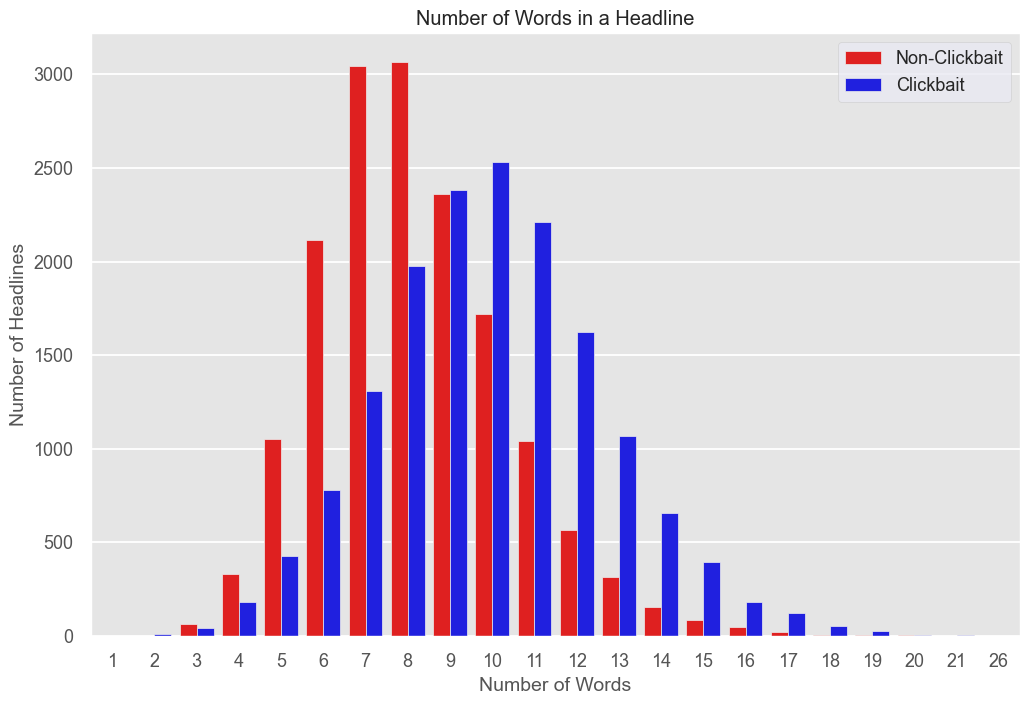

In [65]:
#replotting headline word comparison plot with smaller range
df_words = df[df['headline_words'] < 38]

sns.countplot(df_words['headline_words'],hue=df_words['clickbait'],palette=['red','blue'],data=df_words)
sns.set_style('darkgrid')
plt.xlabel('Number of Words',size=14)
plt.ylabel('Number of Headlines', size=14)
plt.legend(title=None,labels=['Non-Clickbait','Clickbait'],loc='upper right')
plt.title('Number of Words in a Headline')
plt.tight_layout()

plt.show()